In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Dense, Concatenate
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from tensorflow.keras.regularizers import l2
from pytorch_tabnet.tab_model import TabNetClassifier




In [ ]:
data= pd.read_csv('AfSmote_Data.csv')

# Data Preprocessing For Model

Feature: Customer_Age, Score: 0.02112
Feature: Dependent_count, Score: 0.00716
Feature: Education_Level, Score: 0.00707
Feature: Income_Category, Score: 0.00903
Feature: Months_on_book, Score: 0.01393
Feature: Total_Relationship_Count, Score: 0.05230
Feature: Months_Inactive_12_mon, Score: 0.01257
Feature: Contacts_Count_12_mon, Score: 0.01112
Feature: Credit_Limit, Score: 0.02354
Feature: Total_Revolving_Bal, Score: 0.10744
Feature: Avg_Open_To_Buy, Score: 0.02304
Feature: Total_Amt_Chng_Q4_Q1, Score: 0.04455
Feature: Total_Trans_Amt, Score: 0.19144
Feature: Total_Trans_Ct, Score: 0.20647
Feature: Total_Ct_Chng_Q4_Q1, Score: 0.09338
Feature: Avg_Utilization_Ratio, Score: 0.05141
Feature: Gender_F, Score: 0.02561
Feature: Gender_M, Score: 0.02734
Feature: Marital_Status_Divorced, Score: 0.00448
Feature: Marital_Status_Married, Score: 0.03545
Feature: Marital_Status_Single, Score: 0.02428
Feature: Card_Category_Blue, Score: 0.00327
Feature: Card_Category_Gold, Score: 0.00122
Feature: Ca

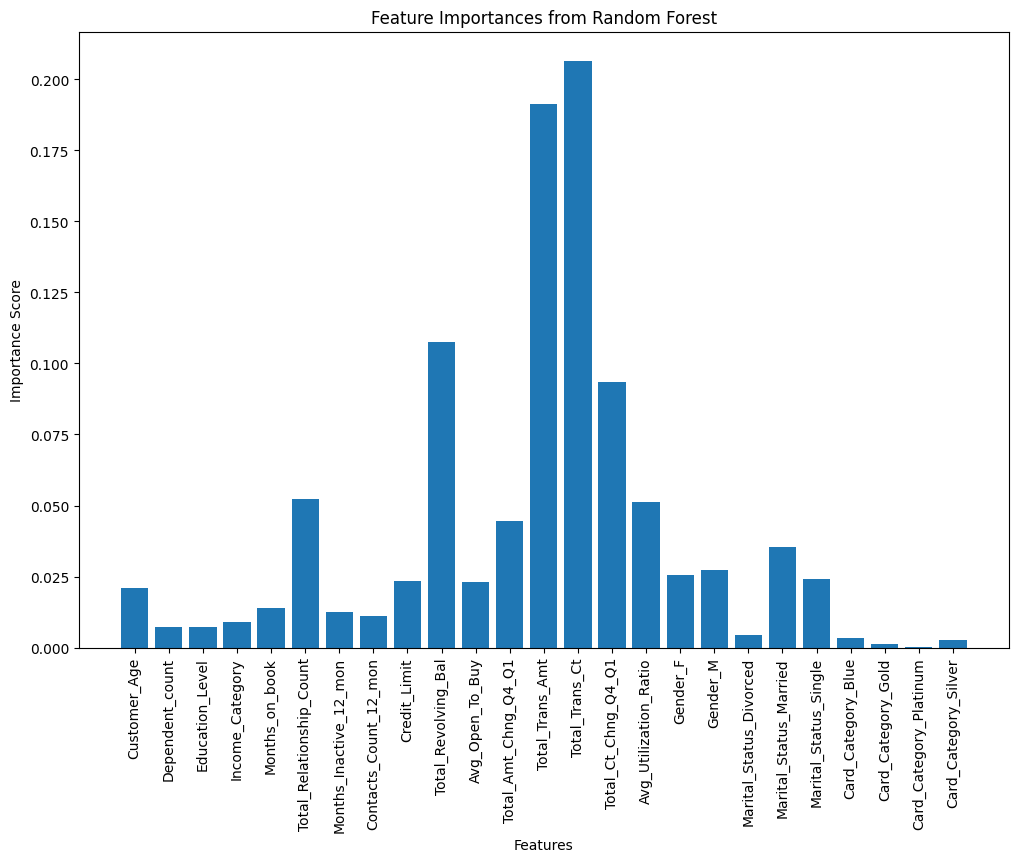

In [ ]:
# Separating the features and the target variable
X = data.drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag']

# Initialize and fit the Random Forest model
model = RandomForestClassifier()
model.fit(X, y)

# Getting feature importances and feature names
importances = model.feature_importances_
feature_names = X.columns  # Getting the feature names

# Print feature importance
for i in range(len(importances)):
    print(f'Feature: {feature_names[i]}, Score: {importances[i]:.5f}')

# Plotting feature importances
plt.figure(figsize=(12, 8))
plt.bar(feature_names, importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances from Random Forest')
plt.show()

In [ ]:

feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print("Sorted Feature Importances:")
feature_importances

Sorted Feature Importances:


,0
Total_Trans_Ct,0.206475
Total_Trans_Amt,0.191437
Total_Revolving_Bal,0.107440
Total_Ct_Chng_Q4_Q1,0.093376
Total_Relationship_Count,0.052299
Avg_Utilization_Ratio,0.051415
Total_Amt_Chng_Q4_Q1,0.044551
Marital_Status_Married,0.035454
Gender_M,0.027338
Gender_F,0.025606


In [ ]:

model_lr = LogisticRegression(max_iter=100)

# Initializing RFE with the Logistic Regression model
rfe = RFE(estimator=model_lr, n_features_to_select=10)
rfe.fit(X, y)  # Using the full dataset for RFE
feature_names_rfe = X.columns

# Results of RFE feature selection
rfe_results = [(feature_names_rfe[i], rfe.support_[i], rfe.ranking_[i]) for i in range(len(rfe.support_))]
rfe_results_df = pd.DataFrame(rfe_results, columns=['Feature', 'Selected', 'Rank'])

rfe_results_df


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,Feature,Selected,Rank
0,Customer_Age,False,5
1,Dependent_count,True,1
2,Education_Level,False,9
3,Income_Category,False,4
4,Months_on_book,False,10
5,Total_Relationship_Count,True,1
6,Months_Inactive_12_mon,False,2
7,Contacts_Count_12_mon,True,1
8,Credit_Limit,True,1
9,Total_Revolving_Bal,True,1


In [ ]:
rfe_results_sorted_df = rfe_results_df.sort_values(by='Rank')
rfe_results_sorted_df


,Feature,Selected,Rank
9,Total_Revolving_Bal,True,1
1,Dependent_count,True,1
16,Gender_F,True,1
20,Marital_Status_Single,True,1
5,Total_Relationship_Count,True,1
7,Contacts_Count_12_mon,True,1
8,Credit_Limit,True,1
14,Total_Ct_Chng_Q4_Q1,True,1
10,Avg_Open_To_Buy,True,1
21,Card_Category_Blue,True,1


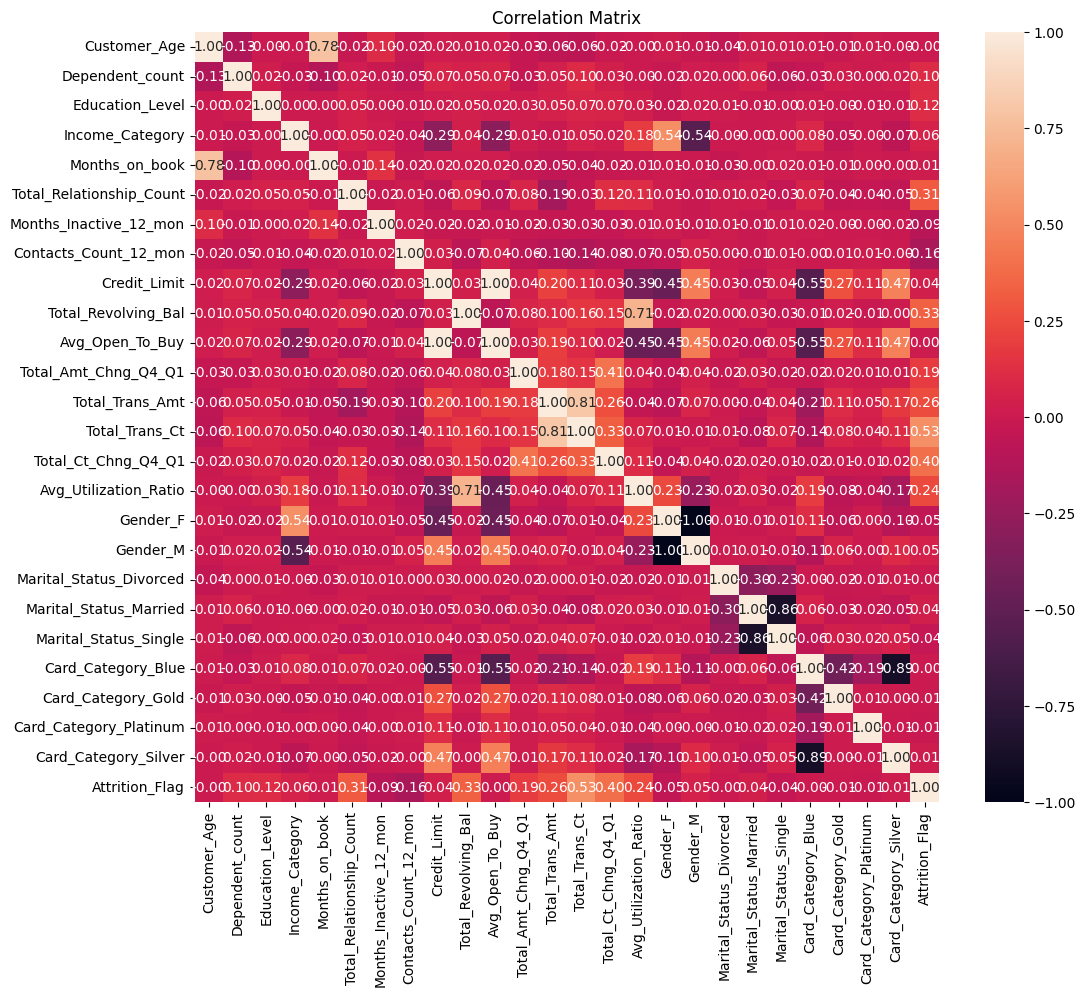

,Attrition_Flag
Attrition_Flag,1.000000
Total_Trans_Ct,0.534760
Total_Ct_Chng_Q4_Q1,0.398297
Total_Revolving_Bal,0.334176
Total_Relationship_Count,0.308418
Total_Trans_Amt,0.255231
Avg_Utilization_Ratio,0.240270
Total_Amt_Chng_Q4_Q1,0.185172
Education_Level,0.115485
Dependent_count,0.104803


In [ ]:
# calculating the correlation matrix
corr_matrix = data.corr()

# visualizing the correlation matrix with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Sorted correlation values for 'Attrition Flag'
sorted_corr_attrition_flag = corr_matrix['Attrition_Flag'].sort_values(ascending=False)
sorted_corr_attrition_flag


In [ ]:
# Creating the specified feature sets and including the target variable
set1_features = ['Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Total_Relationship_Count']
set2_features = ['Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1',
                 'Total_Relationship_Count', 'Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1',
                 'Credit_Limit', 'Gender_F', 'Income_Category', 'Card_Category_Blue',
                 'Avg_Open_To_Buy', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Trans_Amt']
target = 'Attrition_Flag'

set1_data = data[set1_features + [target]]
set2_data = data[set2_features + [target]]

# First few rows of each set
set1_data_head = set1_data.head()
set2_data_head = set2_data.head()

set1_data_head

,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Total_Relationship_Count,Attrition_Flag
0,777,1.625,5,1
1,864,3.714,6,1
2,0,2.333,4,1
3,2517,2.333,3,1
4,0,2.500,5,1


In [ ]:
set2_data_head

,Total_Trans_Ct,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Total_Relationship_Count,Avg_Utilization_Ratio,Total_Amt_Chng_Q4_Q1,Credit_Limit,Gender_F,Income_Category,Card_Category_Blue,Avg_Open_To_Buy,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Trans_Amt,Attrition_Flag
0,42,777,1.625,5,0.061,1.335,12691.0,0.0,2,1.0,11914.0,1,3,1144,1
1,33,864,3.714,6,0.105,1.541,8256.0,1.0,4,1.0,7392.0,1,2,1291,1
2,20,0,2.333,4,0.000,2.594,3418.0,0.0,3,1.0,3418.0,1,0,1887,1
3,20,2517,2.333,3,0.760,1.405,3313.0,1.0,4,1.0,796.0,4,1,1171,1
4,28,0,2.500,5,0.000,2.175,4716.0,0.0,2,1.0,4716.0,1,0,816,1


#FCNN

In [ ]:
# Split dataset into features (X) and target (y)
X = data.drop(columns=['Attrition_Flag'])
y = data['Attrition_Flag']

# Normalizing numerical features using Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Spliting the dataset into training, validation, and test sets (70-15-15 split)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


{
    "Train Size": len(X_train),
    "Validation Size": len(X_val),
    "Test Size": len(X_test)
}


{'Train Size': 11900, 'Validation Size': 2550, 'Test Size': 2550}

In [ ]:
# Define the Fully Connected Neural Network (FCNN)
baseline_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Regularization
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Summary of the model
baseline_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_146 (Dense)                    │ (None, 64)                  │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_46 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_147 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_47 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_148 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_149 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compiling the model
baseline_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model
history = baseline_model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=20,
                    batch_size=32,
                    verbose=1)


Epoch 1/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7288 - loss: 0.5268 - val_accuracy: 0.8804 - val_loss: 0.2815
Epoch 2/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8665 - loss: 0.3129 - val_accuracy: 0.9043 - val_loss: 0.2278
Epoch 3/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8998 - loss: 0.2544 - val_accuracy: 0.9161 - val_loss: 0.2052
Epoch 4/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9050 - loss: 0.2366 - val_accuracy: 0.9263 - val_loss: 0.1906
Epoch 5/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9149 - loss: 0.2140 - val_accuracy: 0.9318 - val_loss: 0.1750
Epoch 6/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9209 - loss: 0.2027 - val_accuracy: 0.9294 - val_loss: 0.1741
Epoch 7/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9194 - loss: 0.1965 - val_accuracy: 0.9306 - val_loss: 0.1709
Epoch 8/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9275 - loss: 0.1865 - val_accuracy: 0.

In [ ]:
# Evaluating on the test set
test_loss, test_accuracy = baseline_model.evaluate(X_test, y_test, verbose=0)

# Predicting probabilities and binary labels for the test set
y_pred_proba = baseline_model.predict(X_test).flatten()
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculating additional metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Output evaluation metrics
{
    "Test Accuracy": test_accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "AUC-ROC": auc_roc
}


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


{'Test Accuracy': 0.9584313631057739,
 'Precision': 0.9717514124293786,
 'Recall': 0.9443137254901961,
 'F1 Score': 0.9578361177406524,
 'AUC-ROC': 0.9910649750096117}

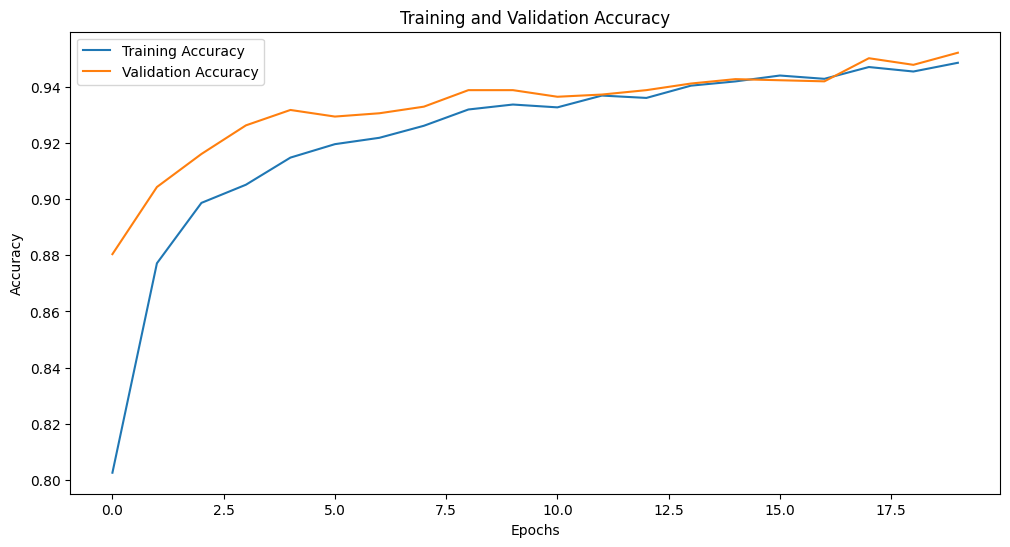

In [ ]:
# Training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




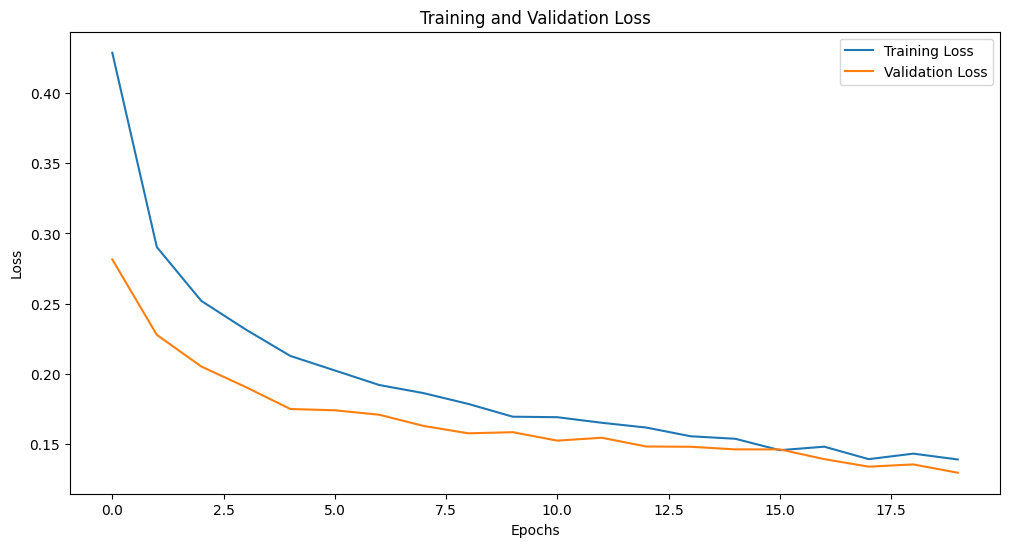

In [ ]:
# Training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

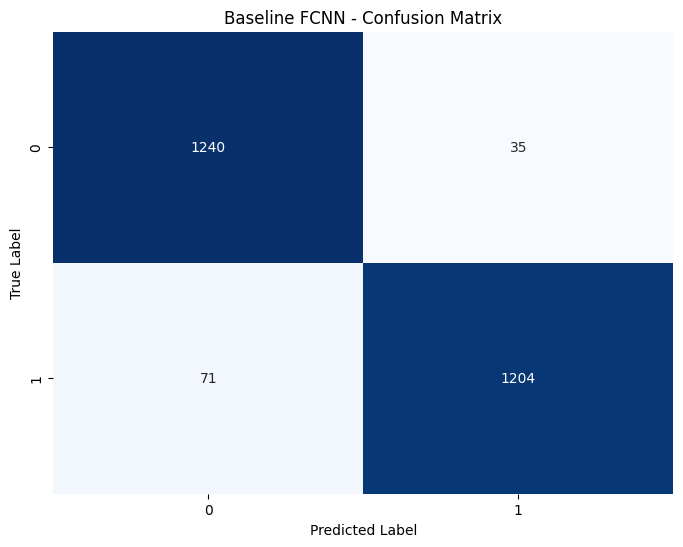

In [ ]:
# Calculate confusion matrix for Baseline FCNN
baseline_fcnn_cm = confusion_matrix(y_test, y_pred)

# Confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

plot_confusion_matrix(baseline_fcnn_cm, "Baseline FCNN")


In [ ]:
# Define the improved model
baseline_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Summary of the model
baseline_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_150 (Dense)                    │ (None, 64)                  │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_48 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_151 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_49 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_152 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_153 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,513 (17.63 KB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
# Compiling the improved model
baseline_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model
history_improved = baseline_model.fit(X_train, y_train,
                             validation_data=(X_val, y_val),
                             epochs=20,
                             batch_size=32,
                             verbose=1)


Epoch 1/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6805 - loss: 0.6999 - val_accuracy: 0.8741 - val_loss: 0.4077
Epoch 2/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8411 - loss: 0.4589 - val_accuracy: 0.8965 - val_loss: 0.3466
Epoch 3/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8672 - loss: 0.3962 - val_accuracy: 0.9078 - val_loss: 0.3078
Epoch 4/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8838 - loss: 0.3603 - val_accuracy: 0.9161 - val_loss: 0.2826
Epoch 5/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8912 - loss: 0.3331 - val_accuracy: 0.9220 - val_loss: 0.2646
Epoch 6/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8993 - loss: 0.3057 - val_accuracy: 0.9259 - val_loss: 0.2444
Epoch 7/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8992 - loss: 0.2994 - val_accuracy: 0.9314 - val_loss: 0.2319
Epoch 8/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9084 - loss: 0.2777 - val_accuracy: 0.

In [ ]:
# Evaluating on the test set
test_loss_improved, test_accuracy_improved = baseline_model.evaluate(X_test, y_test, verbose=0)

# Predicting probabilities and binary labels for the test set
y_pred_proba_improved = baseline_model.predict(X_test).flatten()
y_pred_improved = (y_pred_proba_improved > 0.5).astype(int)

# Calculating additional metrics
precision_improved = precision_score(y_test, y_pred_improved)
recall_improved = recall_score(y_test, y_pred_improved)
f1_improved = f1_score(y_test, y_pred_improved)
auc_roc_improved = roc_auc_score(y_test, y_pred_proba_improved)

# Output evaluation metrics
{
    "Test Accuracy": test_accuracy_improved,
    "Precision": precision_improved,
    "Recall": recall_improved,
    "F1 Score": f1_improved,
    "AUC-ROC": auc_roc_improved
}


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


{'Test Accuracy': 0.9615686535835266,
 'Precision': 0.9726907630522088,
 'Recall': 0.9498039215686275,
 'F1 Score': 0.9611111111111111,
 'AUC-ROC': 0.9930925028835065}

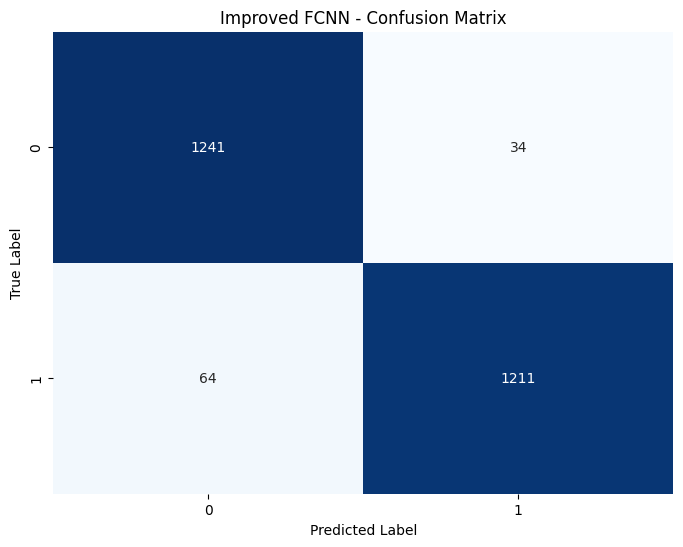

In [ ]:
# Calculating confusion matrix for Improved FCNN
improved_fcnn_cm = confusion_matrix(y_test, y_pred_improved)

# Confusion matrix
plot_confusion_matrix(improved_fcnn_cm, "Improved FCNN")


In [ ]:
baseline_model.save('baseline_model.h5')

#Wide - Deep Models

In [ ]:
set_features = ['Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1',
                 'Total_Relationship_Count', 'Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1',
                 'Credit_Limit', 'Gender_F', 'Income_Category', 'Card_Category_Blue',
                 'Avg_Open_To_Buy', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Trans_Amt']

In [ ]:
# Selecting the engineered features before scaling
X_filtered = data[set_features]
scaler = StandardScaler()
X_scaled_filtered = scaler.fit_transform(X_filtered)

# Spliting the filtered and scaled dataset
X_train_filtered, X_temp_filtered, y_train, y_temp = train_test_split(
    X_scaled_filtered, y, test_size=0.3, random_state=42, stratify=y
)
X_val_filtered, X_test_filtered, y_val, y_test = train_test_split(
    X_temp_filtered, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Checking shapes for confirmation
{
    "X_train Shape": X_train_filtered.shape,
    "X_val Shape": X_val_filtered.shape,
    "X_test Shape": X_test_filtered.shape,
}


{'X_train Shape': (11900, 14),
 'X_val Shape': (2550, 14),
 'X_test Shape': (2550, 14)}

In [ ]:
# Rebuilding the Wide & Deep model
# Input layers
wide_input = Input(shape=(X_train_filtered.shape[1],), name='wide_input')
deep_input = Input(shape=(X_train_filtered.shape[1],), name='deep_input')

# Wide (linear) branch
wide_branch = Dense(1, activation='linear')(wide_input)

# Deep (dense) branch
x = Dense(64, activation='relu')(deep_input)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
deep_branch = Dense(1, activation='sigmoid')(x)

# Combine branches
combined = Concatenate()([wide_branch, deep_branch])
output = Dense(1, activation='sigmoid')(combined)

# Define the model
wide_deep_model = Model(inputs=[wide_input, deep_input], outputs=output)

# Compile the Wide & Deep model
wide_deep_model.compile(optimizer='adam',
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

wide_deep_model.summary()


Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ deep_input (InputLayer)   │ (None, 14)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_161 (Dense)         │ (None, 64)             │            960 │ deep_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_162 (Dense)         │ (None, 32)             │          2,080 │ dense_161[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ wide_input (InputLayer)   │ (None, 14)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_163 (Dense)         │ (None, 16)             │            528 │ dense_162[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_160 (Dense)         │ (None, 1)              │             15 │ wide_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_164 (Dense)         │ (None, 1)              │             17 │ dense_163[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_24            │ (None, 2)              │              0 │ dense_160[0][0],       │
│ (Concatenate)             │                        │                │ dense_164[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_165 (Dense)         │ (None, 1)              │              3 │ concatenate_24[0][0]   │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,603 (14.07 KB)

 Trainable params: 3,603 (14.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the Wide & Deep model with filtered inputs
history_wide_deep = wide_deep_model.fit(
    [X_train_filtered, X_train_filtered],  # Wide and Deep inputs are the same
    y_train,
    validation_data=([X_val_filtered, X_val_filtered], y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)


Epoch 1/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6558 - loss: 0.6216 - val_accuracy: 0.8753 - val_loss: 0.4648
Epoch 2/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8849 - loss: 0.4169 - val_accuracy: 0.8820 - val_loss: 0.3330
Epoch 3/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8927 - loss: 0.3132 - val_accuracy: 0.8910 - val_loss: 0.2859
Epoch 4/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9013 - loss: 0.2743 - val_accuracy: 0.9008 - val_loss: 0.2611
Epoch 5/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9058 - loss: 0.2555 - val_accuracy: 0.9102 - val_loss: 0.2425
Epoch 6/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9184 - loss: 0.2343 - val_accuracy: 0.9094 - val_loss: 0.2380
Epoch 7/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9259 - loss: 0.2153 - val_accuracy: 0.9259 - val_loss: 0.2132
Epoch 8/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9314 - loss: 0.2032 - val_accuracy: 0.

In [ ]:
# Evaluating the Wide & Deep model on the test set
test_loss_wide_deep, test_accuracy_wide_deep = wide_deep_model.evaluate(
    [X_test_filtered, X_test_filtered], y_test, verbose=0
)

# Predicting probabilities and binary labels for the test set
y_pred_proba_wide_deep = wide_deep_model.predict([X_test_filtered, X_test_filtered]).flatten()
y_pred_wide_deep = (y_pred_proba_wide_deep > 0.5).astype(int)

# Calculating additional metrics
precision_wide_deep = precision_score(y_test, y_pred_wide_deep)
recall_wide_deep = recall_score(y_test, y_pred_wide_deep)
f1_wide_deep = f1_score(y_test, y_pred_wide_deep)
auc_roc_wide_deep = roc_auc_score(y_test, y_pred_proba_wide_deep)

# Output evaluation metrics
{
    "Test Accuracy": test_accuracy_wide_deep,
    "Precision": precision_wide_deep,
    "Recall": recall_wide_deep,
    "F1 Score": f1_wide_deep,
    "AUC-ROC": auc_roc_wide_deep
}


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


{'Test Accuracy': 0.9560784101486206,
 'Precision': 0.9589581689029203,
 'Recall': 0.9529411764705882,
 'F1 Score': 0.955940204563336,
 'AUC-ROC': 0.9871575547866206}

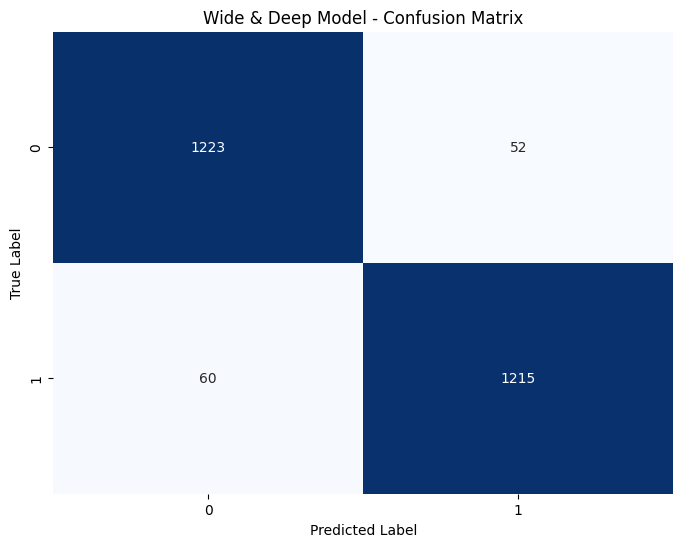

In [ ]:
# Calculating confusion matrix for Wide & Deep Model
wide_deep_cm = confusion_matrix(y_test, y_pred_wide_deep)

# Confusion matrix
plot_confusion_matrix(wide_deep_cm, "Wide & Deep Model")


In [ ]:
!pip install optuna


In [ ]:
import optuna
from tensorflow.keras.optimizers import Adam

# Defining the objective function for Optuna
def objective(trial):
    # Hyperparameters to tune
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
    n_units_layer1 = trial.suggest_int('n_units_layer1', 32, 128, step=16)
    n_units_layer2 = trial.suggest_int('n_units_layer2', 16, 64, step=16)
    n_units_layer3 = trial.suggest_int('n_units_layer3', 8, 32, step=8)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])

    # Building the Wide & Deep model with tuned hyperparameters
    wide_input = Input(shape=(X_train_filtered.shape[1],), name='wide_input')
    deep_input = Input(shape=(X_train_filtered.shape[1],), name='deep_input')

    # Wide branch
    wide_branch = Dense(1, activation='linear')(wide_input)

    # Deep branch
    x = Dense(n_units_layer1, activation='relu')(deep_input)
    x = Dropout(dropout_rate)(x)
    x = Dense(n_units_layer2, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(n_units_layer3, activation='relu')(x)
    deep_branch = Dense(1, activation='sigmoid')(x)

    # Combining branches
    combined = Concatenate()([wide_branch, deep_branch])
    output = Dense(1, activation='sigmoid')(combined)

    model = Model(inputs=[wide_input, deep_input], outputs=output)

    # Compiling the model
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Training the model
    history = model.fit(
        [X_train_filtered, X_train_filtered], y_train,
        validation_data=([X_val_filtered, X_val_filtered], y_val),
        epochs=10,  # Reduce epochs for faster tuning
        batch_size=batch_size,
        verbose=0
    )

    # Evaluating the model on the validation set
    val_accuracy = max(history.history['val_accuracy'])  # Best validation accuracy
    return val_accuracy

# Create a study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)


[I 2024-12-08 17:38:27,490] A new study created in memory with name: no-name-0ed7cc58-5cfc-4b8e-98e2-54c2280497d0
<ipython-input-72-ce655c98430d>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
<ipython-input-72-ce655c98430d>:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
[I 2024-12-08 17:38:36,912] Trial 0 finished with value: 0.8823529481887817 and parameters: {'learning_rate': 0.0008354068713458799, 'n_units_layer1': 112, 'n_units_layer2': 32, 'n_units_layer3': 32, 'dropout_rate': 0.4390058192633828, 'batch_size': 64}. Best is trial 0 with value: 0.8

In [ ]:
# Retrieving best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Rebuilding and training the model with the best hyperparameters
learning_rate = best_params['learning_rate']
n_units_layer1 = best_params['n_units_layer1']
n_units_layer2 = best_params['n_units_layer2']
n_units_layer3 = best_params['n_units_layer3']
dropout_rate = best_params['dropout_rate']
batch_size = best_params['batch_size']

# Building the optimized Wide & Deep model
wide_input = Input(shape=(X_train_filtered.shape[1],), name='wide_input')
deep_input = Input(shape=(X_train_filtered.shape[1],), name='deep_input')

wide_branch = Dense(1, activation='linear')(wide_input)

x = Dense(n_units_layer1, activation='relu')(deep_input)
x = Dropout(dropout_rate)(x)
x = Dense(n_units_layer2, activation='relu')(x)
x = Dropout(dropout_rate)(x)
x = Dense(n_units_layer3, activation='relu')(x)
deep_branch = Dense(1, activation='sigmoid')(x)

combined = Concatenate()([wide_branch, deep_branch])
output = Dense(1, activation='sigmoid')(combined)

optimized_model = Model(inputs=[wide_input, deep_input], outputs=output)

# Compiling and training the optimized model
optimized_model.compile(optimizer=Adam(learning_rate=learning_rate),
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

history_optimized = optimized_model.fit(
    [X_train_filtered, X_train_filtered], y_train,
    validation_data=([X_val_filtered, X_val_filtered], y_val),
    epochs=20,
    batch_size=batch_size,
    verbose=1
)


Best Hyperparameters: {'learning_rate': 0.004686806837374334, 'n_units_layer1': 80, 'n_units_layer2': 16, 'n_units_layer3': 16, 'dropout_rate': 0.17908625583589566, 'batch_size': 16}
Epoch 1/20
744/744 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7135 - loss: 0.5602 - val_accuracy: 0.8608 - val_loss: 0.3258
Epoch 2/20
744/744 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8768 - loss: 0.3046 - val_accuracy: 0.9031 - val_loss: 0.2550
Epoch 3/20
744/744 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9023 - loss: 0.2580 - val_accuracy: 0.9149 - val_loss: 0.2222
Epoch 4/20
744/744 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9117 - loss: 0.2369 - val_accuracy: 0.9231 - val_loss: 0.2077
Epoch 5/20
744/744 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9198 - loss: 0.2108 - val_accuracy: 0.9239 - val_loss: 0.1979
Epoch 6/20
744/744 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9239 - loss: 0.2093 - val_accuracy: 0.9353 - val_loss: 0.1789
Epoch 7/20
744/744 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/st

In [ ]:
# Evaluating the optimized Wide & Deep model on the test set
test_loss_optimized, test_accuracy_optimized = optimized_model.evaluate(
    [X_test_filtered, X_test_filtered], y_test, verbose=0
)

# Predicting probabilities and binary labels for the test set
y_pred_proba_optimized = optimized_model.predict([X_test_filtered, X_test_filtered]).flatten()
y_pred_optimized = (y_pred_proba_optimized > 0.5).astype(int)

# Calculating additional metrics
precision_optimized = precision_score(y_test, y_pred_optimized)
recall_optimized = recall_score(y_test, y_pred_optimized)
f1_optimized = f1_score(y_test, y_pred_optimized)
auc_roc_optimized = roc_auc_score(y_test, y_pred_proba_optimized)

# Output evaluation metrics
{
    "Test Accuracy": test_accuracy_optimized,
    "Precision": precision_optimized,
    "Recall": recall_optimized,
    "F1 Score": f1_optimized,
    "AUC-ROC": auc_roc_optimized
}


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


{'Test Accuracy': 0.95686274766922,
 'Precision': 0.9634049323786794,
 'Recall': 0.9498039215686275,
 'F1 Score': 0.9565560821484992,
 'AUC-ROC': 0.9914039215686274}

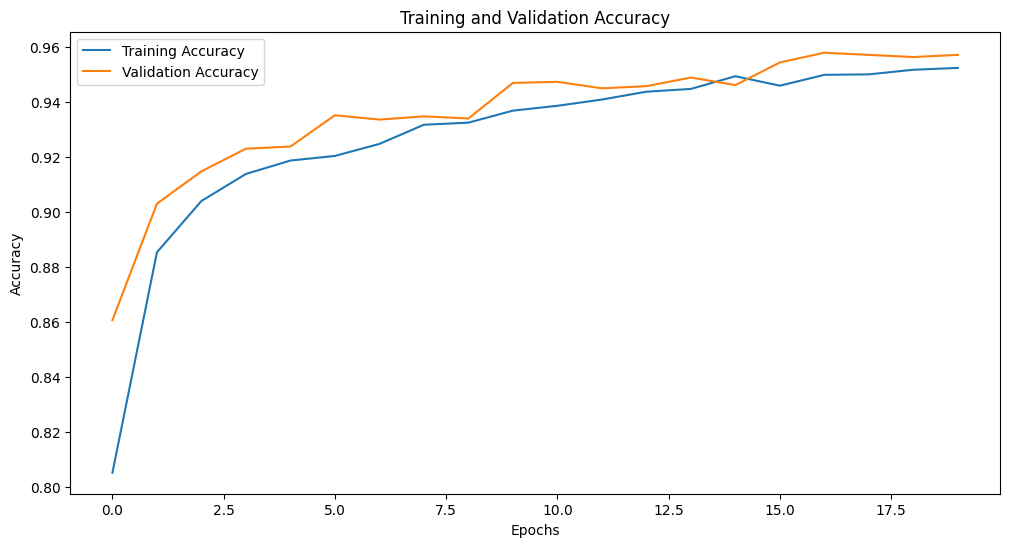

In [ ]:
# Training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history_optimized.history['accuracy'], label='Training Accuracy')
plt.plot(history_optimized.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

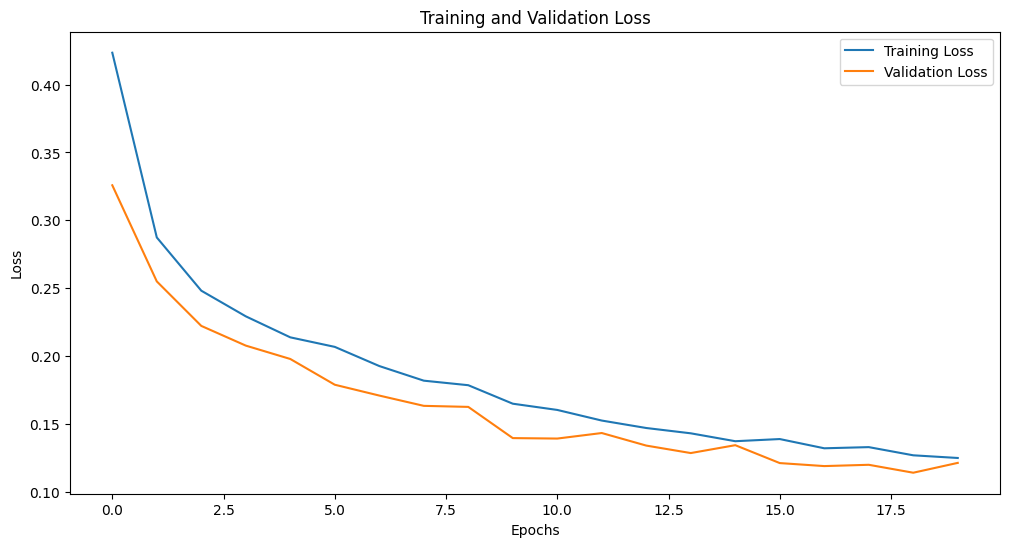

In [ ]:
# Training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history_optimized.history['loss'], label='Training Loss')
plt.plot(history_optimized.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

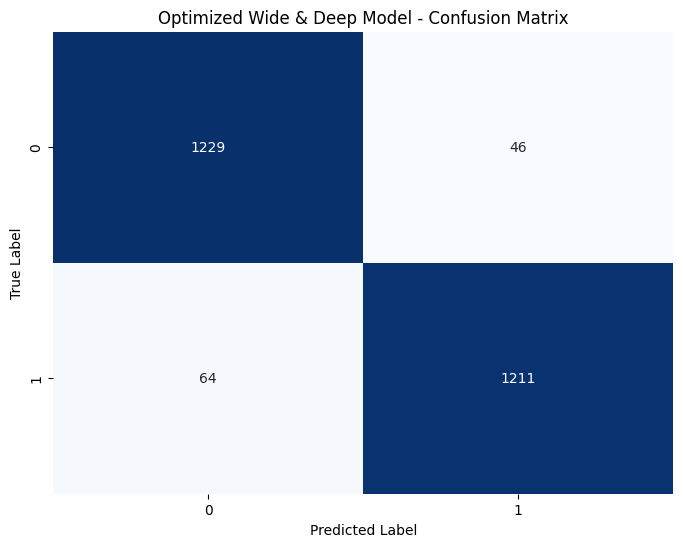

In [ ]:
# Calculating confusion matrix for Optimized Wide & Deep Model
optimized_wide_deep_cm = confusion_matrix(y_test, y_pred_optimized)

# Confusion matrix
plot_confusion_matrix(optimized_wide_deep_cm, "Optimized Wide & Deep Model")


In [ ]:
optimized_model.save('optimized_wide_deep_model.h5')


#TabNet

In [ ]:
!pip install pytorch-tabnet


In [ ]:
# Converting data to NumPy arrays
X_train_tabnet = X_train_filtered
X_val_tabnet = X_val_filtered
X_test_tabnet = X_test_filtered

y_train_tabnet = y_train.values if hasattr(y_train, 'values') else y_train
y_val_tabnet = y_val.values if hasattr(y_val, 'values') else y_val
y_test_tabnet = y_test.values if hasattr(y_test, 'values') else y_test


In [ ]:
# Initializing the TabNet model
tabnet_model = TabNetClassifier()

# Training the model
tabnet_model.fit(
    X_train=X_train_tabnet,
    y_train=y_train_tabnet,
    eval_set=[(X_val_tabnet, y_val_tabnet)],
    eval_name=["val"],
    eval_metric=["accuracy"],
    max_epochs=50,
    patience=10,
    batch_size=256,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)




/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.52705 | val_accuracy: 0.81647 |  0:00:01s
epoch 1  | loss: 0.34984 | val_accuracy: 0.89373 |  0:00:02s
epoch 2  | loss: 0.27343 | val_accuracy: 0.88745 |  0:00:05s
epoch 3  | loss: 0.232   | val_accuracy: 0.90706 |  0:00:07s
epoch 4  | loss: 0.22921 | val_accuracy: 0.91255 |  0:00:08s
epoch 5  | loss: 0.22814 | val_accuracy: 0.90392 |  0:00:10s
epoch 6  | loss: 0.20333 | val_accuracy: 0.92902 |  0:00:11s
epoch 7  | loss: 0.18478 | val_accuracy: 0.9298  |  0:00:12s
epoch 8  | loss: 0.1607  | val_accuracy: 0.94353 |  0:00:13s
epoch 9  | loss: 0.14787 | val_accuracy: 0.94745 |  0:00:14s
epoch 10 | loss: 0.14417 | val_accuracy: 0.95098 |  0:00:16s
epoch 11 | loss: 0.13845 | val_accuracy: 0.95255 |  0:00:19s
epoch 12 | loss: 0.13886 | val_accuracy: 0.94824 |  0:00:21s
epoch 13 | loss: 0.13998 | val_accuracy: 0.9498  |  0:00:22s
epoch 14 | loss: 0.13632 | val_accuracy: 0.9498  |  0:00:23s
epoch 15 | loss: 0.13557 | val_accuracy: 0.95255 |  0:00:24s
epoch 16 | loss: 0.13196

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
# Predicting on the test set
y_pred_tabnet = tabnet_model.predict(X_test_tabnet)
y_pred_proba_tabnet = tabnet_model.predict_proba(X_test_tabnet)[:, 1]

# Calculating evaluation metrics
test_accuracy_tabnet = accuracy_score(y_test_tabnet, y_pred_tabnet)
precision_tabnet = precision_score(y_test_tabnet, y_pred_tabnet)
recall_tabnet = recall_score(y_test_tabnet, y_pred_tabnet)
f1_tabnet = f1_score(y_test_tabnet, y_pred_tabnet)
auc_roc_tabnet = roc_auc_score(y_test_tabnet, y_pred_proba_tabnet)


In [ ]:
{
    "Test Accuracy": test_accuracy_tabnet,
    "Precision": precision_tabnet,
    "Recall": recall_tabnet,
    "F1 Score": f1_tabnet,
    "AUC-ROC": auc_roc_tabnet
}

{'Test Accuracy': 0.9635294117647059,
 'Precision': 0.9758454106280193,
 'Recall': 0.9505882352941176,
 'F1 Score': 0.9630512514898689,
 'AUC-ROC': 0.9944089196462899}

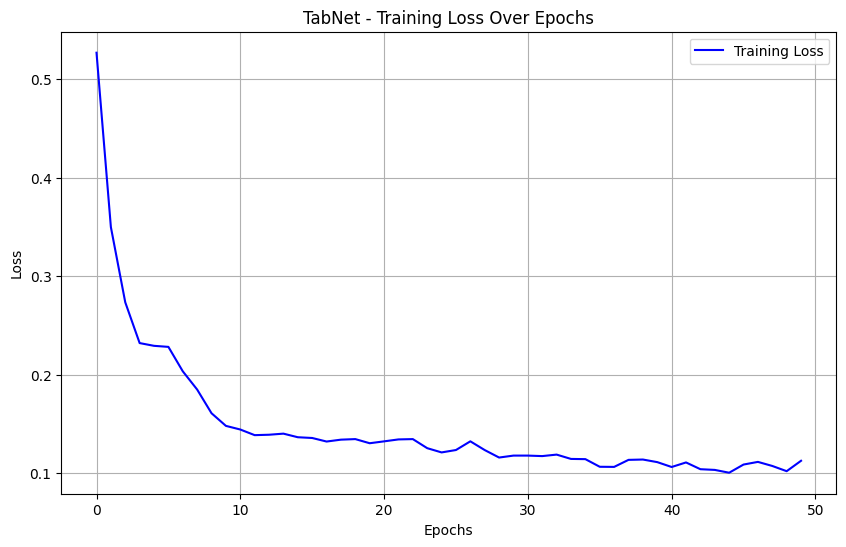

In [ ]:
# Extracting training loss
train_loss = tabnet_model.history['loss']

# Training loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.title("TabNet - Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


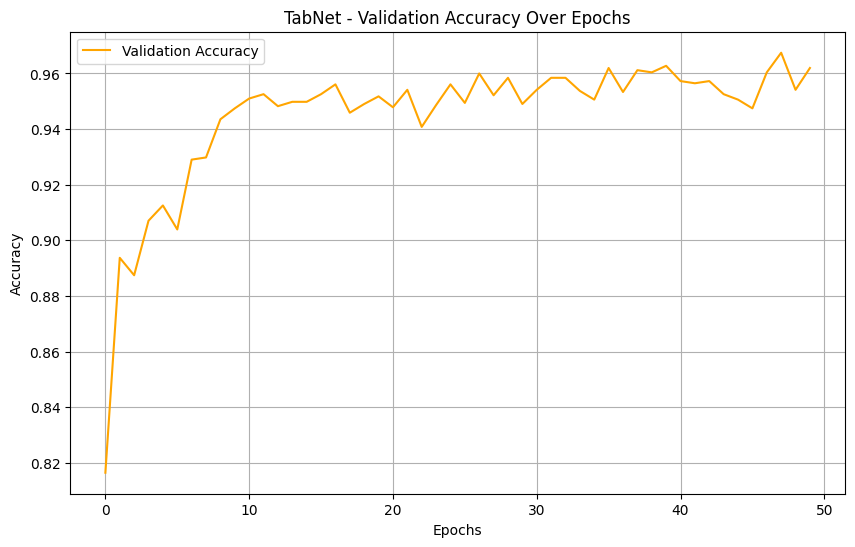

In [ ]:
# Extracting validation accuracy
val_accuracy = tabnet_model.history['val_accuracy']

# Validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
plt.title("TabNet - Validation Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


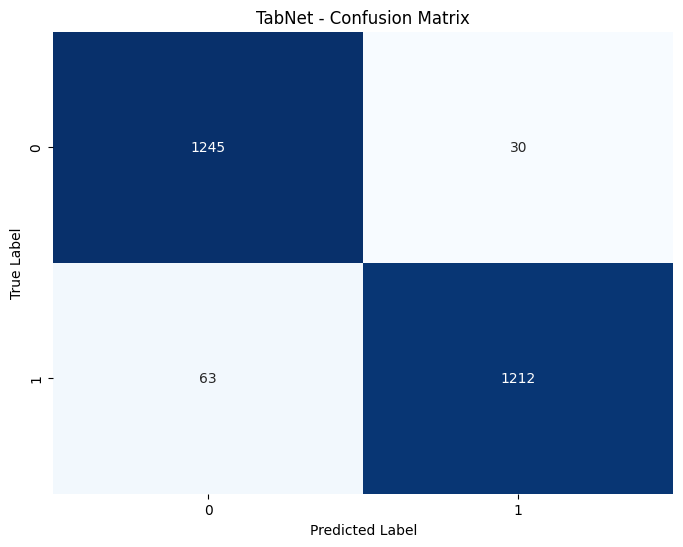

In [ ]:
# Calculating confusion matrix for TabNet
tabnet_cm = confusion_matrix(y_test_tabnet, y_pred_tabnet)

# Confusion matrix
plot_confusion_matrix(tabnet_cm, "TabNet")
